In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_mlp = pd.read_csv("df_cbn_lsa.csv")

In [3]:
df_mlp

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..CBN
0,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.137931
1,0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.137931
2,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
3,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
4,1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0.137931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74995,42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74996,42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74997,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448
74998,42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.103448


In [4]:
df_mlp.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

In [5]:
X = df_mlp.drop(['index', 'X..CBN'], axis = 1)
y = df_mlp[['X..CBN']]

<AxesSubplot:ylabel='Count'>

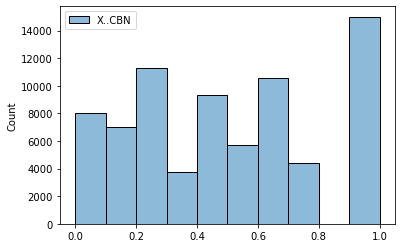

In [6]:
sns.histplot(y, bins = 10)

Train test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [8]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

MLP modeling (before Feature selection and Hyperparameter Tuning)

In [9]:
mlpreg = MLPRegressor(random_state=1, early_stopping=True)
mlpreg.fit(X_train1, y_train1)
y_pred_mlp = mlpreg.predict(X_val)
y_pred_mlp_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
mean_absolute_error(y_val, y_pred_mlp)

0.11573515491695265

In [11]:
#train
r2_score(y_train1, y_pred_mlp_r2)

0.7822342568660193

In [12]:
#val
r2_score(y_val, y_pred_mlp)

0.7110227912060513

Residual plots for each target variable

Feature Selection

In [13]:
rfreg = RandomForestRegressor()

In [14]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [15]:
selector.estimator_.feature_importances_

array([9.25306728e-02, 7.87180473e-02, 9.05944470e-02, 7.76704460e-02,
       9.90511683e-02, 2.02356480e-02, 4.08072218e-03, 4.80743794e-02,
       1.67394384e-04, 1.64747455e-03, 2.73103446e-03, 7.70986277e-09,
       5.69143752e-03, 1.60195850e-04, 2.98933319e-03, 2.52550695e-03,
       6.23599783e-03, 3.95048730e-03, 6.61402898e-09, 7.53274784e-03,
       5.37048613e-09, 0.00000000e+00, 5.35201294e-03, 6.33915183e-03,
       6.05836139e-03, 2.28869394e-03, 4.79562544e-03, 2.09937583e-04,
       6.72618401e-08, 1.39817315e-03, 6.31732581e-03, 4.45446418e-08,
       4.40011003e-03, 0.00000000e+00, 3.95304583e-07, 3.59717773e-03,
       3.98758135e-03, 9.60337341e-03, 3.05984650e-04, 1.60374146e-02,
       2.75936934e-04, 8.95384811e-03, 9.10930711e-05, 2.29497964e-02,
       1.46408793e-03, 2.34151165e-01, 1.04915921e-03, 1.94582567e-04,
       1.04318242e-02, 1.23519015e-03, 2.03335356e-02, 4.98861281e-03,
       3.40190901e-03, 7.43876754e-04, 2.96076968e-03, 1.25516507e-03,
      

In [16]:
selector.threshold_

0.011627906976744186

In [17]:
mask = selector.get_support()

In [18]:
mask

array([ True,  True,  True,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [19]:
selected_features = X.columns[mask]

In [20]:
selected_X = df_mlp[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,sativa,apple,blueberry,cheese,diesel,orange
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
1,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,0,0
2,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
3,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
4,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74995,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,0,0,0,0,0,0
74996,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,0,0,0,0,0,0
74997,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0
74998,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0


In [21]:
selected_X.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'sativa',
 'apple',
 'blueberry',
 'cheese',
 'diesel',
 'orange']

In [22]:
import joblib

joblib.dump(selector, "selector_mlp_lsa_elbow_cbn.pkl")
joblib.dump(selected_X, "selected_X_mlp_lsa_elbow_cbn.pkl")

['selected_X_mlp_lsa_elbow_cbn.pkl']

In [14]:
import joblib

selected_X = joblib.load("selected_X_mlp_lsa_elbow_cbn.pkl")

Train test split (after Feature Selection)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [16]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [17]:
mlpreg.fit(X_train1, y_train1)
y_pred_mlpreg = mlpreg.predict(X_val)
y_pred_mlpreg_r2 = mlpreg.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [18]:
mean_absolute_error(y_val, y_pred_mlpreg)

0.17217323467157258

In [19]:
#train
r2_score(y_train1, y_pred_mlpreg_r2)

0.5209428681697219

In [20]:
#val
r2_score(y_val, y_pred_mlpreg)

0.502218789280775

Hyperparameter Tuning

In [21]:
parameters = {'hidden_layer_sizes': [(100,), (50, 50, 50), (50, 100, 50)],
              'activation': ['tanh', 'relu'], #only tanh and relu
              'max_iter': [200, 500, 1000]
              }

In [23]:
rscv = RandomizedSearchCV(mlpreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs=-1)

In [24]:
rscv.fit(X_train1, y_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_netwo

RandomizedSearchCV(cv=5,
                   estimator=MLPRegressor(early_stopping=True, random_state=1),
                   n_jobs=-1,
                   param_distributions={'activation': ['tanh', 'relu'],
                                        'hidden_layer_sizes': [(100,),
                                                               (50, 50, 50),
                                                               (50, 100, 50)],
                                        'max_iter': [200, 500, 1000]},
                   scoring='neg_mean_absolute_error')

In [25]:
rscv.best_params_

{'max_iter': 200, 'hidden_layer_sizes': (50, 100, 50), 'activation': 'relu'}

In [26]:
joblib.dump(rscv, "rscv_mlp_lsa_elbow_cbn.pkl")
joblib.dump(rscv.best_params_, "rscv_mlp_lsa_elbow_best_params_cbn.pkl")

['rscv_mlp_lsa_elbow_best_params_cbn.pkl']

MLP fit (after hyperparameter tuning)

In [27]:
mlpreg_ht = MLPRegressor(random_state=1, max_iter=200, activation = 'relu', hidden_layer_sizes= (50,100,50), early_stopping=True)
mlpreg_ht.fit(X_train1, y_train1)
y_pred_mlp_ht = mlpreg_ht.predict(X_val)
y_pred_mlp_r2_ht = mlpreg_ht.predict(X_train1)

/Users/andalanputra/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
mean_absolute_error(y_val, y_pred_mlp_ht)

0.13258460813110987

In [29]:
#train
r2_score(y_train1, y_pred_mlp_r2_ht)

0.7214226699747066

In [30]:
#val
r2_score(y_val, y_pred_mlp_ht)

0.6859734364303886

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [31]:
y_pred_mlpreg_test = mlpreg_ht.predict(X_test)

In [32]:
joblib.dump(y_pred_mlpreg_test, "y_pred_mlpreg_test_lsa_elbow_cbn.pkl")
joblib.dump(y_test, "y_test_mlpreg_lsa_elbow_cbn.pkl")

['y_test_mlpreg_lsa_elbow_cbn.pkl']

In [33]:
mean_absolute_error(y_test, y_pred_mlpreg_test)

0.1323002556848046

In [34]:
mean_squared_error(y_test, y_pred_mlpreg_test)

0.0305102083837057

In [35]:
mean_squared_error(y_test, y_pred_mlpreg_test, squared = False)

0.17467171603813167

In [36]:
r2_score(y_test, y_pred_mlpreg_test)

0.6908338387173706

Error analysis

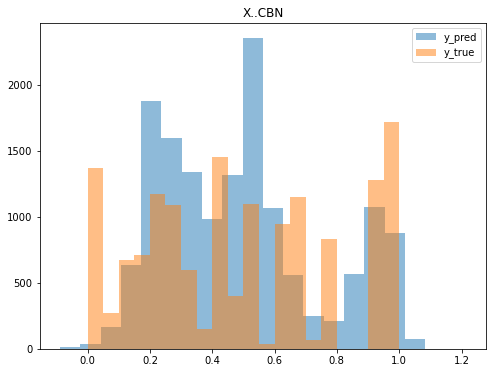

<Figure size 432x288 with 0 Axes>

In [37]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..CBN"  # specify the target variable name
ax.hist(y_pred_mlpreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_mlp_lsa_elbow_cbn.png')

Pearson R

In [38]:
corr_coef, p_value = pearsonr(y_pred_mlpreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.832
P-value: 0.000


<AxesSubplot:>

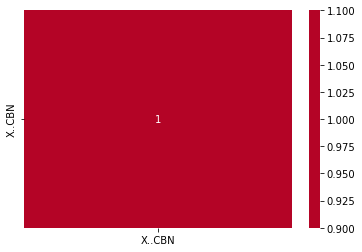

In [39]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)